In [22]:
from linear_system_solver import DynamicSystem 
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [23]:
import jax.numpy as jnp
from jax import jit

@jit
def rk4_step(u, dt, A):
    """Runge-Kutta 4th order step for the system defined by A."""
    def f(u):
        return A @ u

    k1 = dt * f(u)
    k2 = dt * f(u + 0.5 * k1)
    k3 = dt * f(u + 0.5 * k2)
    k4 = dt * f(u + k3)
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6

delta_t = 1/6
t_max = 3/2 * jnp.pi
n_steps = int(t_max / delta_t) + 1

A = jnp.array([
    [2 - delta_t**2, -1],
    [1, 0]
])

u0 = jnp.array([1, 1])
U = jnp.zeros((2, n_steps), dtype=jnp.float32)
U = U.at[:, 0].set(u0)

for i in range(1, n_steps):
    U = U.at[:, i].set(rk4_step(U[:, i-1], delta_t, A))

y = U[0, :]
y_prime = jnp.zeros(n_steps)
y_prime = y_prime.at[1:-1].set((y[2:] - y[:-2]) / (2 * delta_t))
y_prime = y_prime.at[0].set((y[1] - y[0]) / delta_t)
y_prime = y_prime.at[-1].set((y[-1] - y[-2]) / delta_t)

/home/redhat_pc/Documents/redhat_files/.venv/lib/python3.12/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float64 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [24]:
A = jnp.array ([[0,1],
                [-1,-0.1]])
u = jnp.array ([1,0])
t = jnp.linspace (0,t_max,200)
d= DynamicSystem (A,u)
s= d.states_over_time(t)
u1,u2 = s 


AttributeError: module 'jax.experimental.key_reuse' has no attribute 'unconsumed_copy'

/home/redhat_pc/Documents/redhat_files/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.5, 1.5)

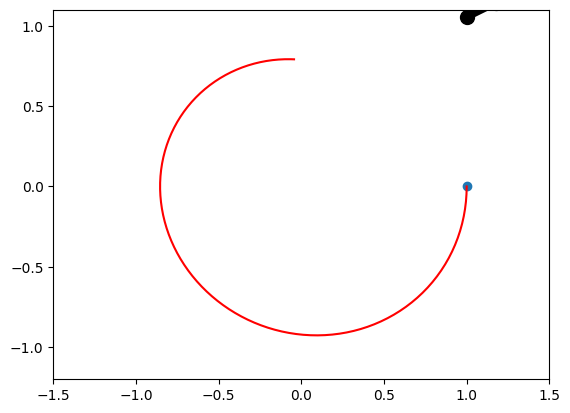

In [ ]:
plt.plot(y, y_prime, "-ko", linewidth=5, markersize=10)
plt.plot(u1, u2 , alpha = 1, color= "red")
plt.scatter ([1] , [0] )
plt.ylim (-1.2,1.1)
plt.xlim (-1.5,1.5)

/home/redhat_pc/Documents/redhat_files/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


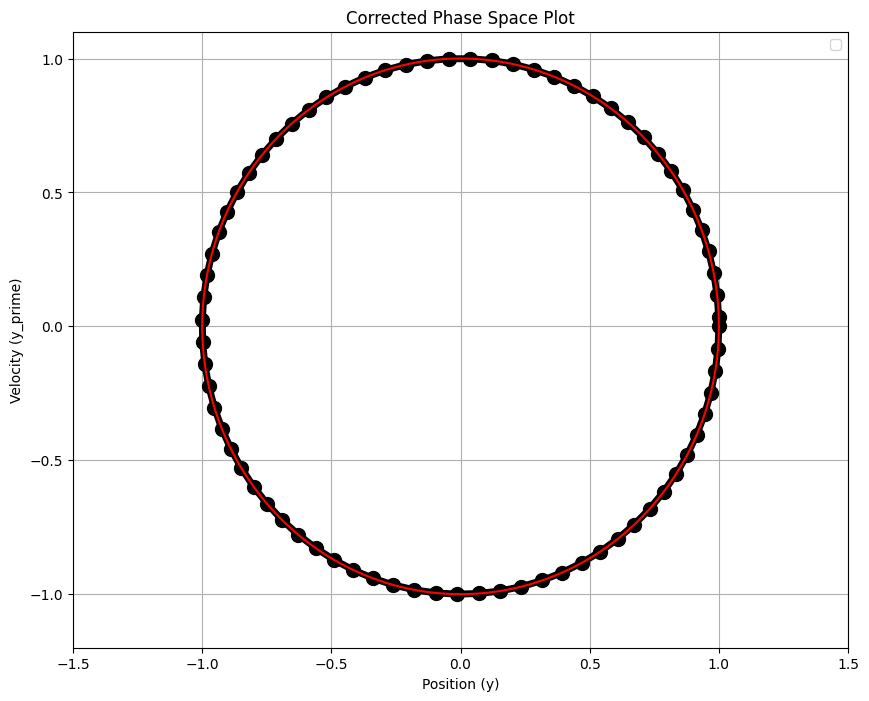

In [ ]:
import jax.numpy as jnp
from jax import jit

@jit
def rk4_step(u, dt, A):
    """Runge-Kutta 4th order step for the system defined by A."""
    def f(u):
        return A @ u

    k1 = dt * f(u)
    k2 = dt * f(u + 0.5 * k1)
    k3 = dt * f(u + 0.5 * k2)
    k4 = dt * f(u + k3)
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6

delta_t = 1/12 # Smaller time step may help improve accuracy
t_max = 2* jnp.pi
n_steps = int(t_max / delta_t) + 1

A = jnp.array([
    [0, 1],   # Adjusted to reflect typical simple harmonic oscillator
    [-1, 0]   # Negative sign to ensure correct rotational direction
])

u0 = jnp.array([1, 0])  # Starting at (1,0)
U = jnp.zeros((2, n_steps), dtype=jnp.float32)
U = U.at[:, 0].set(u0)

for i in range(1, n_steps):
    U = U.at[:, i].set(rk4_step(U[:, i-1], delta_t, A))
    
u = jnp.array ([1,0])
t = jnp.linspace (0,t_max,200)
d= DynamicSystem (A,u)
s= d.states_over_time(t)
u1,u2 = s 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(U[0, :], U[1, :], "-ko", linewidth=5, markersize=10)
plt.plot(u1, u2 , alpha = 1, color= "red")
plt.scatter ([1] , [0] )
plt.title('Corrected Phase Space Plot')
plt.xlabel('Position (y)')
plt.ylabel('Velocity (y_prime)')
plt.grid(True)
plt.ylim (-1.2,1.1)
plt.xlim (-1.5,1.5)
plt.legend()
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 1/100
t_max = 2 * np.pi  # One complete cycle
n_steps = int(t_max / dt) + 1

# Matrix A
A = np.array([
    [1,dt],
    [-dt,1]
])
Lambda , X = jnp.linalg.eig (A)
Lambda =jnp.diag (Lambda.conjugate())
A = X@Lambda@jnp.linalg.inv (X)
# Initial conditions
U = np.zeros((2, n_steps))
U[:, 0] = [1, 0]  # y(0) = 1, approx y(-dt) = y(0) due to y'(0) = 0

# Populate U for each time step
for n in range(1, n_steps):
    U[:, n] = A @ U[:, n-1]
    
plt.figure(figsize=(6, 6))
plt.plot(u1, u2 ,"k--", alpha = 1)
plt.plot(U[0], U[1], "-ko", linewidth=4, markersize=9,label='Phase Plot')
plt.scatter([1], [0], color='red', label='Initial State')  # Initial point
plt.title('Phase Space Plot of Harmonic Oscillator')
plt.xlabel('Position (y)')
plt.ylabel('Velocity (y\')')
plt.axis('equal')  # Ensure the aspect ratio is equal to show a perfect circle
plt.legend()
plt.grid(True)
plt.show()

AttributeError: module 'jax.experimental.key_reuse' has no attribute 'unconsumed_copy'

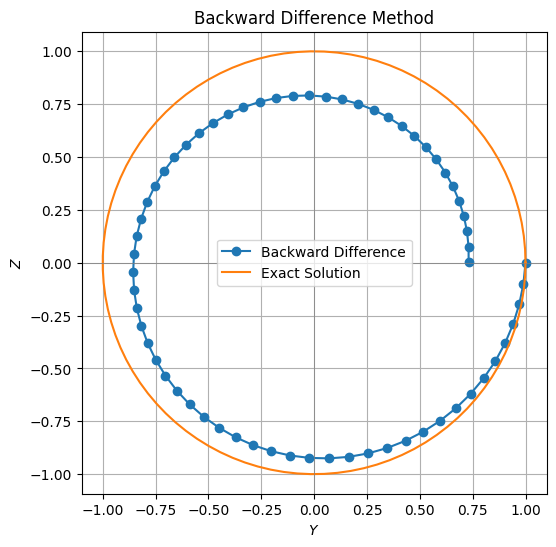

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dt = 0.1  # Time step size
n_steps = 63  # Number of steps
A = np.array([[1, -dt], [dt, 1]])  # Backward difference matrix

# Initialize arrays
Y = np.zeros(n_steps + 1)
Z = np.zeros(n_steps + 1)

# Initial conditions
Y[0] = 1  # y(0) = 1
Z[0] = 0  # z(0) = 0

# Time stepping loop
for n in range(n_steps):
    U_next = np.linalg.inv(A) @ np.array([Y[n], Z[n]])
    Y[n+1] = U_next[0]
    Z[n+1] = U_next[1]

# Plotting the results
plt.figure(figsize=(6, 6))
plt.plot(Y, Z, 'o-', label='Backward Difference')
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), label='Exact Solution')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('$Y$')
plt.ylabel('$Z$')
plt.title('Backward Difference Method')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


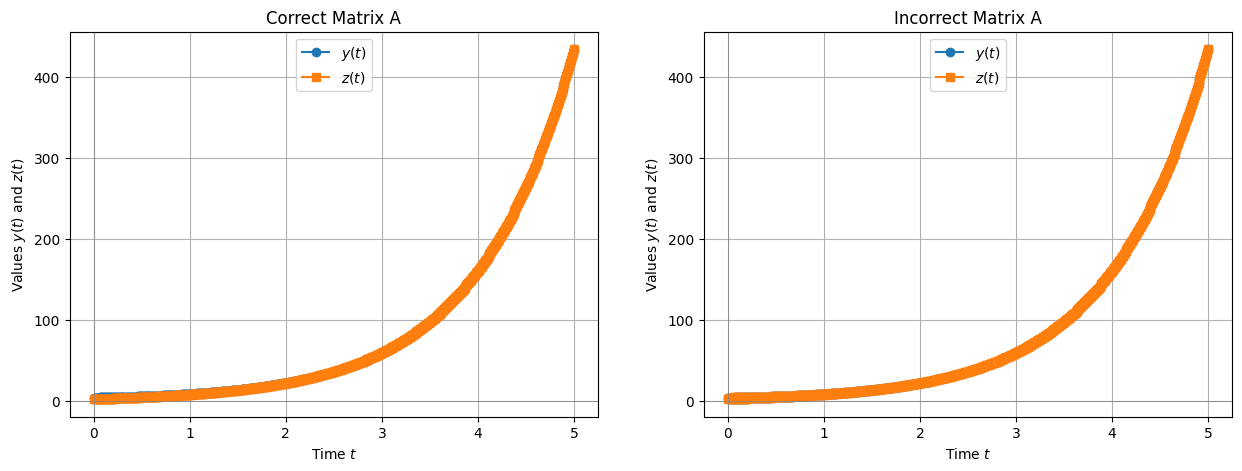

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Define time parameters
dt = 0.01
t_max = 5
t = jnp.arange(0, t_max + dt, dt)
n_steps = len(t)

# Define the initial condition
u0 = jnp.array([4, 2])

# Initialize the solution arrays
U_correct = jnp.zeros((2, n_steps))
U_correct = U_correct.at[:, 0].set(u0)

U_incorrect = jnp.zeros((2, n_steps))
U_incorrect = U_incorrect.at[:, 0].set(u0)

# Correct matrix A
A_correct = jnp.array([
    [0, 1],
    [1, 0]
])

# Incorrect matrix A
A_incorrect = jnp.array([
    [dt, 1],
    [1, dt]
])

# Euler method to solve the system using the correct matrix
for i in range(1, n_steps):
    U_correct = U_correct.at[:, i].set(U_correct[:, i-1] + dt * (A_correct @ U_correct[:, i-1]))

# Euler method to solve the system using the incorrect matrix
for i in range(1, n_steps):
    U_incorrect = U_incorrect.at[:, i].set(A_incorrect @ U_incorrect[:, i-1])

# Plotting the results for the correct matrix A
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(t, U_correct[0, :], label='$y(t)$', marker='o')
plt.plot(t, U_correct[1, :], label='$z(t)$', marker='s')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Time $t$')
plt.ylabel('Values $y(t)$ and $z(t)$')
plt.title('Correct Matrix A')
plt.legend()
plt.grid(True)

# Plotting the results for the incorrect matrix A
plt.subplot(1, 2, 2)
plt.plot(t, U_incorrect[0, :], label='$y(t)$', marker='o')
plt.plot(t, U_incorrect[1, :], label='$z(t)$', marker='s')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Time $t$')
plt.ylabel('Values $y(t)$ and $z(t)$')
plt.title('Incorrect Matrix A')
plt.legend()
plt.grid(True)

plt.show()


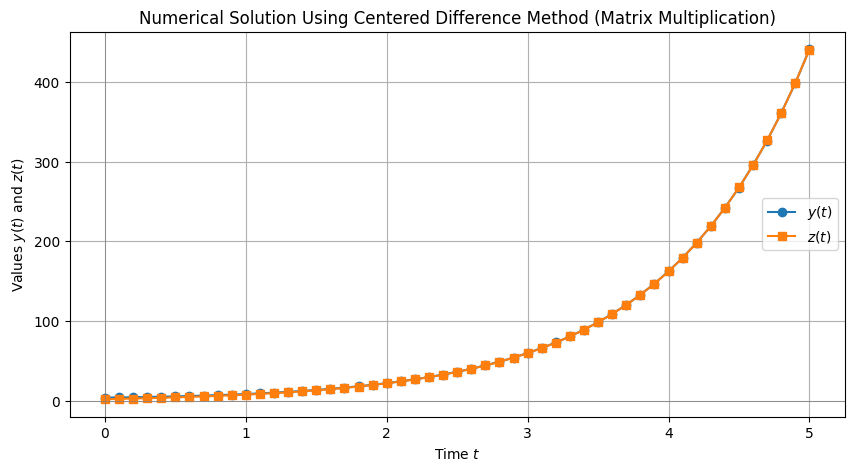

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time parameters
dt = 0.1
t_max = 5
t = np.arange(0, t_max + dt, dt)
n_steps = len(t)

# Initial conditions
u0 = np.array([4, 2])

# Initialize the solution array
U = np.zeros((2, n_steps))
U[:, 0] = u0

# Use Euler method to find the second time step
U[:, 1] = u0 + dt * np.array([u0[1], u0[0]])  # Forward Euler step for initialization

# Define the matrices
A = np.array([
    [0, 2 * dt],
    [2 * dt, 0]
])
I = np.identity(2)

# Centered difference method to solve the system using matrix multiplication
for i in range(1, n_steps - 1):
    U[:, i + 1] = A @ U[:, i] + I @ U[:, i - 1]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t, U[0, :], label='$y(t)$', marker='o')
plt.plot(t, U[1, :], label='$z(t)$', marker='s')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Time $t$')
plt.ylabel('Values $y(t)$ and $z(t)$')
plt.title('Numerical Solution Using Centered Difference Method (Matrix Multiplication)')
plt.legend()
plt.grid(True)
plt.show()


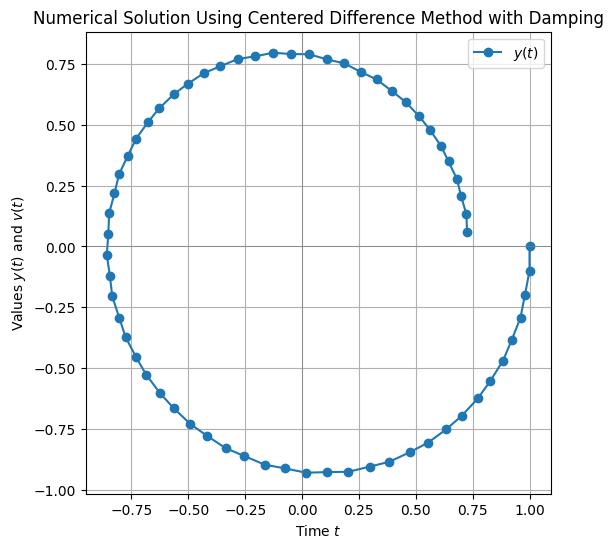

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define time parameters
# Parameters
dt = 1/10
t_max = 2 * np.pi  # One complete cycle
n_steps = int(t_max / dt) + 1

# Initial conditions
y0 = 1
v0 = 0
u0 = np.array([y0, v0])

# Initialize the solution array
U = np.zeros((2, n_steps))
U[:, 0] = u0

# Use Euler method to find the second time step for initialization
U[:, 1] = u0 + dt * np.array([v0, -0.1 * v0 - y0])

# Define the matrices
A = np.array([
    [0, 2 * dt],
    [-2 * dt, -0.2 * dt]
])
B = np.identity(2)

# Centered difference method to solve the system using matrix multiplication
for i in range(1, n_steps - 1):
    U[:, i + 1] = A @ U[:, i] + B @ U[:, i - 1]

# Plotting the results
plt.figure(figsize=(6, 6))
plt.plot(U[0, :], U[1, :], label='$y(t)$', marker='o')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Time $t$')
plt.ylabel('Values $y(t)$ and $v(t)$')
plt.title('Numerical Solution Using Centered Difference Method with Damping')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dfdx(1.)

Array(4., dtype=float32, weak_type=True)